In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import math

In [8]:
import brsflufight_nerc2  as bff2

In [60]:
data_sets, data_columns = bff2.load_data_files()

In [9]:
[c for c in data_sets]

['historical_GHG_Sectors_GCP',
 'historical_GHG_Sectors_PIK',
 'historical_GHG_Sectors_UNFCCC',
 'mobility_apple',
 'mobility_citymapper',
 'mobility_google',
 'uk_energy_daily']

In [61]:
d = {}
for c in data_sets:
    d[c] = bff2.DataSet(data_sets[c], data_columns[c])

In [77]:
c = 'mobility_google'


In [64]:
d[c].get_country_string('London')

'GB_United Kingdom_Greater London'

In [66]:
d[c].get_country('London').head()

,unique_geo_id,date,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,
2020-02-15,GB_United Kingdom_Greater London,2020-02-15,GB,United Kingdom,Greater London,NaN,NaN,NaN,-11.0,-8.0,-34.0,-10.0,-3.0,2.0
2020-02-16,GB_United Kingdom_Greater London,2020-02-16,GB,United Kingdom,Greater London,NaN,NaN,NaN,-9.0,-11.0,-41.0,-9.0,-4.0,1.0
2020-02-17,GB_United Kingdom_Greater London,2020-02-17,GB,United Kingdom,Greater London,NaN,NaN,NaN,11.0,4.0,28.0,-3.0,-13.0,2.0
2020-02-18,GB_United Kingdom_Greater London,2020-02-18,GB,United Kingdom,Greater London,NaN,NaN,NaN,4.0,-2.0,11.0,-4.0,-13.0,2.0
2020-02-19,GB_United Kingdom_Greater London,2020-02-19,GB,United Kingdom,Greater London,NaN,NaN,NaN,3.0,-3.0,3.0,-5.0,-13.0,3.0


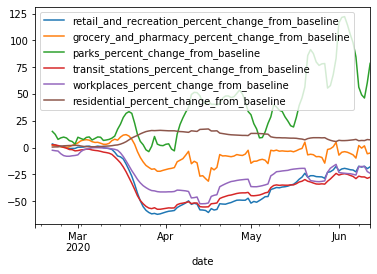

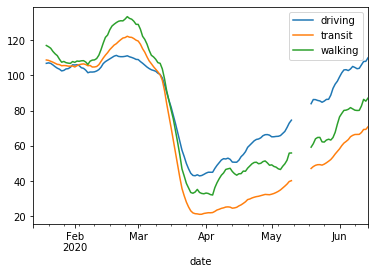

In [80]:
d['mobility_google'].get_country_data('Germany').rolling(7).mean().plot()
d['mobility_apple'].get_country_data('Germany').rolling(7).mean().plot()

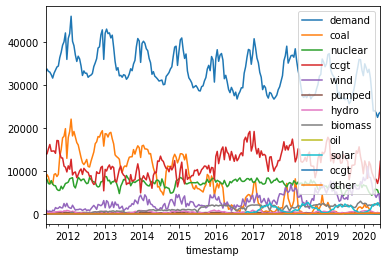

In [76]:
c = 'uk_energy_daily'
d[c].get_country_data('United Kingdom').groupby(pd.Grouper(freq='14D')).mean().plot()

In [85]:
country = 'United Kingdom'
d_uk = {}
for dset in d:
    try:
        d_uk[dset] = d[dset].get_country(country)
        print(f"Success: {dset}")
    except:
        print(f"Failed: {country} not in {dset}")


Success: historical_GHG_Sectors_GCP
Success: historical_GHG_Sectors_PIK
Success: historical_GHG_Sectors_UNFCCC
Success: mobility_apple
Failed: United Kingdom not in mobility_citymapper
Success: mobility_google
Success: uk_energy_daily


In [109]:
corrs = {}
for dset in d_uk:
    print(dset)
    corrs[dset] = d_uk[dset].loc[d_uk[dset].index > "2008",sorted(d[dset].data_columns)].corr()
    display(corrs[dset].style.background_gradient().set_precision(2))

historical_GHG_Sectors_GCP


,Bunkers (CO2),Cement (CO2),Coal (CO2),Gas (CO2),Gas flaring (CO2),Oil (CO2),Total fossil fuels and cement (CO2)
Bunkers (CO2),nan,nan,nan,nan,nan,nan,nan
Cement (CO2),nan,1.00,-0.79,-0.53,0.28,-0.29,-0.92
Coal (CO2),nan,-0.79,1.00,0.07,-0.53,-0.23,0.89
Gas (CO2),nan,-0.53,0.07,1.00,0.47,0.88,0.52
Gas flaring (CO2),nan,0.28,-0.53,0.47,1.00,0.66,-0.23
Oil (CO2),nan,-0.29,-0.23,0.88,0.66,1.00,0.21
Total fossil fuels and cement (CO2),nan,-0.92,0.89,0.52,-0.23,0.21,1.00


historical_GHG_Sectors_PIK


,Agriculture (CH4),Agriculture (CO2),Agriculture (KYOTOGHG),Agriculture (N2O),Energy (CH4),Energy (CO2),Energy (KYOTOGHG),Energy (N2O),Industrial Processes and Product Use (CH4),Industrial Processes and Product Use (CO2),Industrial Processes and Product Use (F-Gas),Industrial Processes and Product Use (KYOTOGHG),Industrial Processes and Product Use (N2O),Other (CH4),Other (CO2),Other (KYOTOGHG),Other (N2O),Total excluding LULUCF (CH4),Total excluding LULUCF (CO2),Total excluding LULUCF (F-Gas),Total excluding LULUCF (KYOTOGHG),Total excluding LULUCF (N2O),Waste (CH4),Waste (CO2),Waste (KYOTOGHG),Waste (N2O)
Agriculture (CH4),1.00,-0.27,0.82,0.59,-0.83,-0.85,-0.85,0.10,-0.77,-0.27,-0.27,-0.38,-0.36,nan,nan,-0.86,-0.86,-0.74,-0.84,-0.27,-0.84,-0.27,-0.72,-0.45,-0.72,0.73
Agriculture (CO2),-0.27,1.00,0.25,0.21,0.59,0.40,0.40,-0.55,0.31,-0.12,0.09,0.12,0.52,nan,nan,0.58,0.58,0.60,0.39,0.09,0.43,0.67,0.59,0.69,0.59,-0.45
Agriculture (KYOTOGHG),0.82,0.25,1.00,0.84,-0.57,-0.68,-0.68,-0.06,-0.52,-0.21,-0.22,-0.30,-0.26,nan,nan,-0.60,-0.60,-0.52,-0.68,-0.22,-0.66,-0.04,-0.52,-0.12,-0.52,0.54
Agriculture (N2O),0.59,0.21,0.84,1.00,-0.43,-0.48,-0.48,0.19,-0.12,0.12,-0.18,-0.11,-0.39,nan,nan,-0.46,-0.46,-0.49,-0.47,-0.18,-0.48,-0.04,-0.51,-0.08,-0.52,0.47
Energy (CH4),-0.83,0.59,-0.57,-0.43,1.00,0.96,0.96,-0.33,0.74,0.27,0.43,0.55,0.73,nan,nan,0.99,0.99,0.94,0.96,0.43,0.97,0.73,0.92,0.57,0.91,-0.89
Energy (CO2),-0.85,0.40,-0.68,-0.48,0.96,1.00,1.00,-0.20,0.83,0.43,0.57,0.69,0.68,nan,nan,0.96,0.96,0.86,1.00,0.57,1.00,0.68,0.83,0.49,0.83,-0.87
Energy (KYOTOGHG),-0.85,0.40,-0.68,-0.48,0.96,1.00,1.00,-0.21,0.84,0.42,0.56,0.68,0.68,nan,nan,0.96,0.96,0.87,1.00,0.56,1.00,0.68,0.84,0.50,0.84,-0.88
Energy (N2O),0.10,-0.55,-0.06,0.19,-0.33,-0.20,-0.21,1.00,-0.03,0.52,0.15,0.14,-0.75,nan,nan,-0.33,-0.33,-0.57,-0.19,0.15,-0.25,-0.60,-0.61,-0.61,-0.61,0.38
Industrial Processes and Product Use (CH4),-0.77,0.31,-0.52,-0.12,0.74,0.83,0.84,-0.03,1.00,0.53,0.50,0.64,0.39,nan,nan,0.76,0.76,0.60,0.84,0.50,0.82,0.49,0.57,0.55,0.56,-0.70
Industrial Processes and Product Use (CO2),-0.27,-0.12,-0.21,0.12,0.27,0.43,0.42,0.52,0.53,1.00,0.71,0.87,-0.05,nan,nan,0.26,0.26,0.00,0.44,0.71,0.40,0.14,-0.05,-0.34,-0.06,-0.19


historical_GHG_Sectors_UNFCCC


,Agriculture (Aggregate GHGs),Energy (Aggregate GHGs),Industrial Processes (Aggregate GHGs),Land-Use Change and Forestry (Aggregate GHGs),Other (Aggregate GHGs),Solvent and Other Product Use (Aggregate GHGs),Total GHG emissions with LULUCF (Aggregate GHGs),Total GHG emissions without LULUCF (Aggregate GHGs),Waste (Aggregate GHGs)
Agriculture (Aggregate GHGs),1.00,-0.69,-0.27,-0.66,nan,nan,-0.68,-0.68,-0.54
Energy (Aggregate GHGs),-0.69,1.00,0.63,0.90,nan,nan,1.00,1.00,0.84
Industrial Processes (Aggregate GHGs),-0.27,0.63,1.00,0.45,nan,nan,0.63,0.63,0.28
Land-Use Change and Forestry (Aggregate GHGs),-0.66,0.90,0.45,1.00,nan,nan,0.90,0.90,0.86
Other (Aggregate GHGs),nan,nan,nan,nan,nan,nan,nan,nan,nan
Solvent and Other Product Use (Aggregate GHGs),nan,nan,nan,nan,nan,nan,nan,nan,nan
Total GHG emissions with LULUCF (Aggregate GHGs),-0.68,1.00,0.63,0.90,nan,nan,1.00,1.00,0.86
Total GHG emissions without LULUCF (Aggregate GHGs),-0.68,1.00,0.63,0.90,nan,nan,1.00,1.00,0.86
Waste (Aggregate GHGs),-0.54,0.84,0.28,0.86,nan,nan,0.86,0.86,1.00


mobility_apple


,driving,transit,walking
driving,1.00,0.94,0.94
transit,0.94,1.00,0.95
walking,0.94,0.95,1.00


mobility_google


,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline,1.00,0.32,-0.73,0.89,0.84,0.80
parks_percent_change_from_baseline,0.32,1.00,-0.07,0.14,0.17,0.06
residential_percent_change_from_baseline,-0.73,-0.07,1.00,-0.88,-0.93,-0.98
retail_and_recreation_percent_change_from_baseline,0.89,0.14,-0.88,1.00,0.98,0.91
transit_stations_percent_change_from_baseline,0.84,0.17,-0.93,0.98,1.00,0.95
workplaces_percent_change_from_baseline,0.80,0.06,-0.98,0.91,0.95,1.00


uk_energy_daily


,biomass,ccgt,coal,demand,hydro,nuclear,ocgt,oil,other,pumped,solar,wind
biomass,1.00,0.29,-0.69,-0.26,0.10,-0.25,0.11,-0.07,0.54,-0.34,0.48,0.42
ccgt,0.29,1.00,-0.28,0.29,-0.05,-0.08,0.17,0.01,0.09,0.12,0.09,-0.21
coal,-0.69,-0.28,1.00,0.71,0.14,0.24,-0.04,0.11,-0.53,0.44,-0.60,-0.40
demand,-0.26,0.29,0.71,1.00,0.35,0.23,0.10,0.11,-0.29,0.51,-0.51,-0.10
hydro,0.10,-0.05,0.14,0.35,1.00,-0.06,0.07,0.04,0.06,0.23,-0.17,0.34
nuclear,-0.25,-0.08,0.24,0.23,-0.06,1.00,-0.18,0.02,-0.46,0.34,-0.28,-0.27
ocgt,0.11,0.17,-0.04,0.10,0.07,-0.18,1.00,0.06,0.21,0.02,0.07,0.09
oil,-0.07,0.01,0.11,0.11,0.04,0.02,0.06,1.00,-0.04,0.04,-0.04,-0.03
other,0.54,0.09,-0.53,-0.29,0.06,-0.46,0.21,-0.04,1.00,-0.47,0.51,0.53
pumped,-0.34,0.12,0.44,0.51,0.23,0.34,0.02,0.04,-0.47,1.00,-0.42,-0.25


In [165]:
energy_demand = d_uk['uk_energy_daily'][['oil', 'ccgt', 'coal', 'demand']]
energy_ghg = d_uk['historical_GHG_Sectors_PIK']['Energy (KYOTOGHG)']
energy_demand_yearly = energy_demand.groupby(pd.Grouper(freq='1Y')).mean()

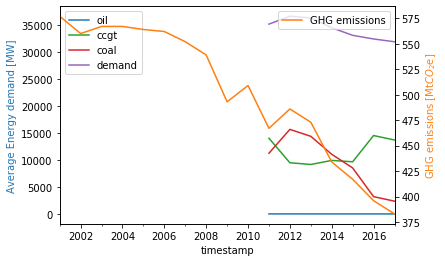

In [169]:
fig, ax1 = plt.subplots()
c1 ="C0"
c2 ="C1"
energy_demand_yearly.plot(y=[c for c in energy_demand_yearly],ax=ax1, color=["C0", "C2", "C3", "C4"], label=[c for c in energy_demand_yearly])
ax2 = ax1.twinx()
energy_ghg[energy_ghg.index > "2000"].plot(ax=ax2, color=c2, label="GHG emissions")

ax1.set_ylabel('Average Energy demand [MW]', color=c1)
ax2.set_ylabel('GHG emissions [Mt$CO_2$e]', color=c2)
ax1.legend()
ax2.legend()

In [171]:
merged = pd.merge_asof(
    energy_ghg[energy_ghg.index > "2010"], 
    energy_demand_yearly, 
    left_index=True, right_index=True, direction='nearest')

In [172]:
merged.corr().style.background_gradient().set_precision(2)

,Energy (KYOTOGHG),oil,ccgt,coal,demand
Energy (KYOTOGHG),1.00,0.84,0.13,0.71,0.79
oil,0.84,1.00,-0.22,0.82,0.85
ccgt,0.13,-0.22,1.00,-0.57,-0.38
coal,0.71,0.82,-0.57,1.00,0.96
demand,0.79,0.85,-0.38,0.96,1.00
